# Polygon Open Data Example

In [ ]:
import earthkit.data

request = {
    "class": "ai",
    "stream" : "oper",
    "type" : "fc",
    "date" : "20250224",
    "time" : "0000",
    "levtype" : "sfc",
    "expver" : "0102", 
    "model": "aifs-single",
    "domain" : "g",
    "param" : "166/167/169",
    "step" : "0",
    "feature": {
        "type": "polygon",
        "shape": [[41.870881288,-8.8791360], [41.694339317422646, -8.824238614026456], [40.171924585721314, -8.902386975546364], [38.75694209400925, -9.493088042617785], [38.42424252381525, -9.171674240710018], [38.49907333213173, -8.676525850529856], [37.057269459205145, -8.971873318897366], [37.162874354643776, -7.406745406502978], [38.19776118392036, -6.931663452624974], [38.4280922170291, -7.321584397020473], [39.011852875635526, -6.9787177479519755], [39.66227871551288, -7.5393956904523804], [39.66568774825791, -7.03915852435145], [40.0019453234905, -6.883203763416162], [40.20373392742229, -7.035724907677206], [40.350463990828985, -6.8135246275213035], [41.030499770212515, -6.905947651233703], [41.593647729084154, -6.22847017956974], [41.67712153119277, -6.544984134823352], [41.949682257268876, -6.567927092516641], [41.96960294343674, -7.1747800681640115], [41.88337981339092, -7.196871678410446], [41.81334515396762,-8.156666519264604], [42.14242723772878, -8.205142297350534], [41.870881288,-8.8791360]],
    },
}

ds = earthkit.data.from_source("polytope", "ecmwf-mars", request, stream=False, address='polytope.ecmwf.int')

## Convert to xarray

In [2]:
da = ds.to_xarray()
da

<xarray.Dataset> Size: 5kB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 94)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2025-02-24T00:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 8B 0
  * points     (points) int64 752B 0 1 2 3 4 5 6 7 8 ... 86 87 88 89 90 91 92 93
    x          (points) float64 752B 37.24 37.24 37.24 ... 41.73 41.73 42.01
    y          (points) float64 752B 351.3 351.7 352.0 ... 352.8 353.2 351.7
    z          (points) float64 752B 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Data variables:
    10v        (datetimes, number, steps, points) float64 752B -1.994 ... 2.59
    2t         (datetimes, number, steps, points) float64 752B 283.4 ... 280.7
    ssrd       (datetimes, number, steps, points) float64 752B 0.0 0.0 ... 0.0
Attributes:
    class:          ai
    Forecast date:  2025-02-24T00:00:00Z
    domain:         g
    expver:         0102
    levtype:        sfc
    model:          aifs-single
    step:           0
    stream:         oper
    type:           fc
    number:         0
    date:           2025-02-24T00:00:00Z

## Visualise data

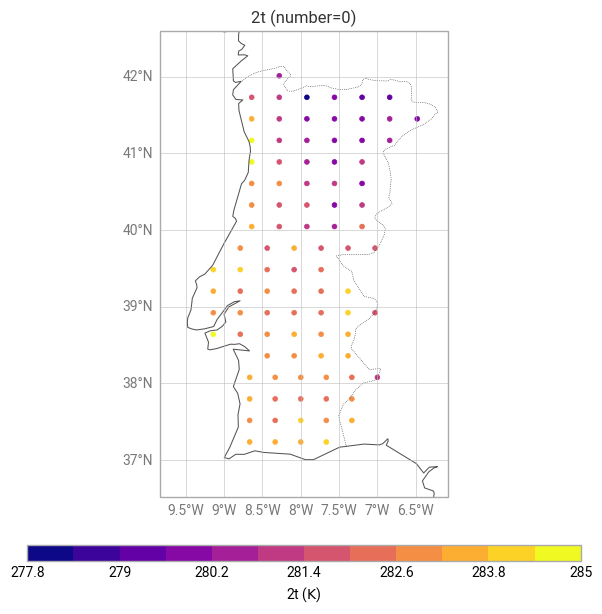

In [3]:
da = ds.to_xarray()
import earthkit.plots
chart = earthkit.plots.Map(domain="Portugal")
chart.point_cloud(da['2t'], x="y", y="x")

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("{variable_name} (number={number})")

chart.legend()

chart.show()